# 一．一元（特征）线性回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

## 1.1导入ｔｘｔ并绘制散点图

In [2]:
data = pd.read_csv("ex1data1.txt",names = ['population','profit'])
data.head()

population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

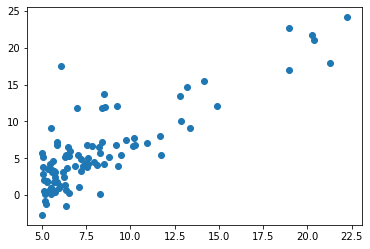

In [3]:
x = data.population
y = data.profit
plt.scatter(x,y)

## 1.2代价函数

In [4]:
"初始化,所有变量都是ｍａｔｒｉｘ"
df = data.copy()#因为ｉｎｓｅｒｔ会改变原数组，所以先复制一份，坑１．
df.insert(0,"one",1)
X = df.iloc[:,0:df.shape[1]-1]
y = df.iloc[:,df.shape[1]-1:df.shape[1]]#df.iloc[:,-1]是个一维数组(series)，ｒｅｓｈａｐｅ（９７，１）都不行，坑２．
theta = np.zeros(2)
y = np.matrix(y)
X = np.matrix(X)
x = np.matrix(x)
x = x.T #行向量／列向量傻傻分不清　坑３
theta = np.matrix(theta)
H = X*(theta.T)
X,y,x,H,theta

(matrix([[ 1.    ,  6.1101],
         [ 1.    ,  5.5277],
         [ 1.    ,  8.5186],
         [ 1.    ,  7.0032],
         [ 1.    ,  5.8598],
         [ 1.    ,  8.3829],
         [ 1.    ,  7.4764],
         [ 1.    ,  8.5781],
         [ 1.    ,  6.4862],
         [ 1.    ,  5.0546],
         [ 1.    ,  5.7107],
         [ 1.    , 14.164 ],
         [ 1.    ,  5.734 ],
         [ 1.    ,  8.4084],
         [ 1.    ,  5.6407],
         [ 1.    ,  5.3794],
         [ 1.    ,  6.3654],
         [ 1.    ,  5.1301],
         [ 1.    ,  6.4296],
         [ 1.    ,  7.0708],
         [ 1.    ,  6.1891],
         [ 1.    , 20.27  ],
         [ 1.    ,  5.4901],
         [ 1.    ,  6.3261],
         [ 1.    ,  5.5649],
         [ 1.    , 18.945 ],
         [ 1.    , 12.828 ],
         [ 1.    , 10.957 ],
         [ 1.    , 13.176 ],
         [ 1.    , 22.203 ],
         [ 1.    ,  5.2524],
         [ 1.    ,  6.5894],
         [ 1.    ,  9.2482],
         [ 1.    ,  5.8918],
         [ 1. 

In [5]:
def costfunction(X,y,H):
    n = np.power((H-y),2)
    return np.sum(n)/(2*len(X))
costfunction(X,y,H)

32.072733877455676

## 1.3批量梯度下降

In [6]:
alpha = 0.01
m = len(X)
times = 1000
def gradient_descent(theta,X,y,alpha,m,H,times):
    thetas_0 = [0]
    thetas_1 = [0]
    cost = [costfunction(X,y,H)]
    for i in range(times):
        H = X*theta.T
        erro = H - y
        temp = np.matrix([0,0])
        temp = theta - erro.T * X * alpha/m #矩阵运算是精髓，临时变量很重要．坑４
        thetas_0.append(temp[0,0])
        thetas_1.append(temp[0,1])
        theta = temp
        cost.append(costfunction(X,y,H))
    return theta,cost,thetas_0,thetas_1

In [7]:
final_theta,cost,thetas_0,thetas_1= gradient_descent(theta,X,y,alpha,m,H,times)
final_theta,cost,thetas_0,thetas_1

87691,
  0.8491954897877779,
  0.8498152910081079,
  0.8504339749773481,
  0.8510515437094506,
  0.8516679992147372,
  0.8522833434999061,
  0.8528975785680377,
  0.8535107064186024,
  0.8541227290474656,
  0.8547336484468955,
  0.8553434666055688,
  0.8559521855085775,
  0.8565598071374354,
  0.8571663334700842,
  0.8577717664809001,
  0.8583761081407008,
  0.8589793604167507,
  0.8595815252727688,
  0.8601826046689336,
  0.8607826005618906,
  0.8613815149047582,
  0.861979349647134,
  0.8625761067351013,
  0.8631717881112356,
  0.8637663957146104,
  0.864359931480804,
  0.8649523973419058,
  0.865543795226522,
  0.8661341270597828,
  0.8667233947633476,
  0.8673116002554124,
  0.8678987454507151,
  0.8684848322605423,
  0.8690698625927351,
  0.8696538383516959,
  0.8702367614383937,
  0.8708186337503713,
  0.8713994571817509,
  0.8719792336232401,
  0.8725579649621387,
  0.873135653082344,
  0.8737122998643578,
  0.874287907185292,
  0.8748624769188749,
  0.8754360109354568,
  0.8760

## 1.4绘图

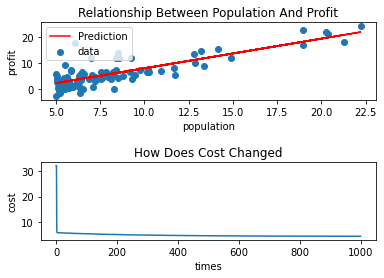

In [8]:
fig,(ax1,ax2) = plt.subplots(2,1)
H = final_theta * X.T
H = H.T
ax1.plot(x,H,c = 'r',label = 'Prediction')
ax1.scatter(data.population,data.profit,label = 'data')
ax1.legend(loc = 2)
ax2.plot(cost)
ax1.set_xlabel('population')
ax1.set_ylabel('profit')
ax1.set_title('relationship between population and profit'.title())
ax2.set_xlabel('times')
ax2.set_ylabel('cost')
ax2.set_title('how does cost changed'.title())
fig.subplots_adjust(hspace = 0.8)

## 1.5绘制代价函数三维图和等高线图(不知道对不对）

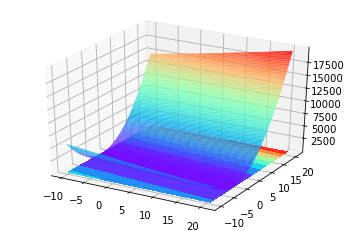

In [9]:
fig,ax = plt.subplots(1,2)
ax = plt.axes(projection='3d')
xline = np.arange(-10,21,0.2)
yline = np.arange(-10,21,0.2)
XX, YY = np.meshgrid(xline, yline)
t_theta = np.matrix(np.zeros((1,2)))
ZZ = np.zeros((155,155))
for i in range(155):
    for j in range(155):
        t_theta[:,0] = XX[i,j]
        t_theta[:,1] = YY[i,j]
        H = X*t_theta.T
        ZZ[i,j] = costfunction(X,y,H)
ax.plot_surface(XX,YY,ZZ,cstride=1,rstride=1,cmap = 'rainbow')
ax.contourf(XX,YY,ZZ,zdir = 'z',offset = -10 , cmap = 'rainbow')

## 二．多元（特征）线性回归

In [10]:
"""读取数据"""
data2 = pd.read_csv('ex1data2.txt',names=['square', 'bedrooms', 'price'])
"""特征缩放"""
x = data2.iloc[:,0:data2.shape[1]-1]
y = data2.iloc[:,data2.shape[1]-1:]
x = (x - np.average(x,axis = 0))/np.std(x,axis = 0,ddof = 1)#ddof = 1,有偏和无偏？
y = (y - np.average(y,axis = 0))/np.std(y,axis = 0,ddof = 1)
data2.head()

square  bedrooms   price
0    2104         3  399900
1    1600         3  329900
2    2400         3  369000
3    1416         2  232000
4    3000         4  539900

In [11]:
"""矩阵化"""
X = x.copy()
X.insert(0,'one',1)
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(X.shape[1]))
H = X*theta.T
X.shape,y.shape,theta.shape,H.shape

((47, 3), (47, 1), (1, 3), (47, 1))

In [12]:
"""梯度下降"""
final_theta,cost,thetas_0,thetas_1= gradient_descent(theta,X,y,alpha,m,H,times)
final_theta,cost
final_theta

matrix([[-1.22032968e-16,  8.26450444e-01,  4.64110444e-03]])

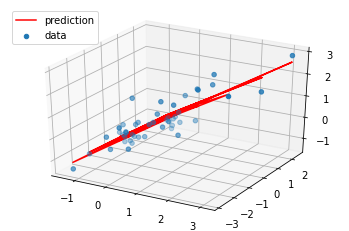

In [13]:
"""绘图，拟合的直线我画不出．．．是精度问题？"""
fig,ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.scatter(x.iloc[:,0],x.iloc[:,1],y,label = 'data')
x_1 = np.array(X[:,1]).reshape(47)
x_2 = np.array(X[:,2]).reshape(47)
ax.plot3D(x_1,x_2,x_1*final_theta[0,1]+x_2*final_theta[0,2]+final_theta[0,0],label = 'prediction',c = 'r')
###plot3D参数搞不清，三个坐标必须一或两个一维数组，剩下的由前面的变量推算？
ax.legend(loc = 2)

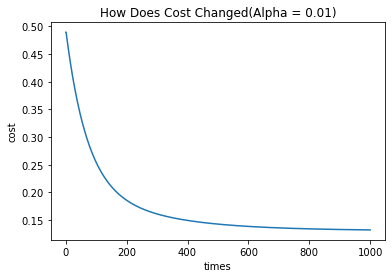

In [14]:
"""收敛情况"""
fig,ax = plt.subplots()
ax.set_xlabel('times')
ax.set_ylabel('cost')
ax.set_title('how does cost changed(alpha = 0.01)'.title())
ax.plot(cost)

### 学习率

In [15]:
alphas = [1,0.1,0.01,0.001,0.0001,0.00001]

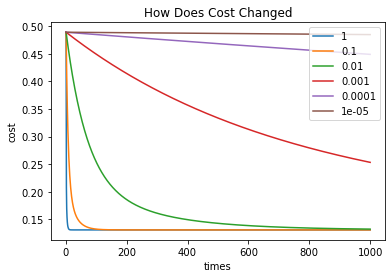

In [16]:
fig,ax = plt.subplots()
ax.set_xlabel('times')
ax.set_ylabel('cost')
ax.set_title('how does cost changed'.title())
for alpha in alphas:
    final_theta,cost,thetas_0,thetas_1= gradient_descent(theta,X,y,alpha,m,H,times)
    ax.plot(cost,label = alpha)
ax.legend(loc=1)

## 三．正规方程

In [17]:
"""读取数据"""
data３ = pd.read_csv('ex1data2.txt',names=['square', 'bedrooms', 'price'])
"""特征缩放"""
x = data３.iloc[:,0:data３.shape[1]-1]
y = data３.iloc[:,data３.shape[1]-1:]
x = (x - np.average(x,axis = 0))/np.std(x,axis = 0,ddof = 1)
y = (y - np.average(y,axis = 0))/np.std(y,axis = 0,ddof = 1)
data3.head()

square  bedrooms   price
0    2104         3  399900
1    1600         3  329900
2    2400         3  369000
3    1416         2  232000
4    3000         4  539900

In [18]:
"""矩阵化"""
X = x.copy()
X.insert(0,'one',1)
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.zeros(X.shape[1]))
def normalEqn(X, y):
    inner = X.T*X
    theta = inner.I * X.T * y
    return theta
final_theta = normalEqn(X, y).T
final_theta

matrix([[-1.14491749e-16,  8.84765988e-01, -5.31788197e-02]])

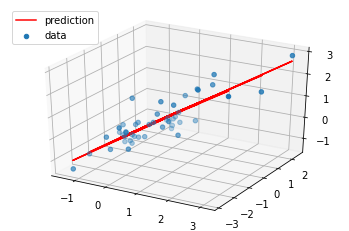

In [19]:
"""拟合好了吗？"""
fig,ax = plt.subplots()
ax = plt.axes(projection='3d')
ax.scatter(x.iloc[:,0],x.iloc[:,1],y,label = 'data')
x_1 = np.array(X[:,1]).reshape(47)
x_2 = np.array(X[:,2]).reshape(47)
ax.plot3D(x_1,x_2,x_1*final_theta[0,1]+x_2*final_theta[0,2]+final_theta[0,0],c = 'r',label = 'prediction')
ax.legend(loc = 2)